### Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Generate latitudes and longitudes
# 1. They need to be stored so that we can access them later
# 2. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


2. Loop Through the List of Cities and Build the City URL

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | quibdo
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | raudeberg
Processing Record 12 of Set 1 | tanjong malim
City not found. Skipping...
Processing Record 13 of Set 1 | olafsvik
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | sobolevo
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | maniitsoq
Processing Record 21 of Set 1 | mount gambier
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | biltine
Processing Record 24

Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | tres passos
Processing Record 41 of Set 4 | visby
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | najran
Processing Record 44 of Set 4 | guaimaro
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | taonan
Processing Record 47 of Set 4 | san miniato
Processing Record 48 of Set 4 | bundaberg
Processing Record 49 of Set 4 | altar
Processing Record 50 of Set 4 | turka
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | tirumullaivasal
Processing Record 5 of Set 5 | huilong
Processing Record 6 of Set 5 | ambilobe
Processing Record 7 of Set 5 | utiroa
City not found. Skipping...
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | denham springs
Processing Record 10 of Set 5 | finnsnes
Processing Record 11 of Set 5 | vila do maio
Processing Record 12 of

Processing Record 24 of Set 8 | lakatoro
Processing Record 25 of Set 8 | okhotsk
Processing Record 26 of Set 8 | artyk
City not found. Skipping...
Processing Record 27 of Set 8 | san cristobal
Processing Record 28 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 8 | adrar
Processing Record 30 of Set 8 | pueblo nuevo
Processing Record 31 of Set 8 | xianyang
Processing Record 32 of Set 8 | tocopilla
Processing Record 33 of Set 8 | bilibino
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | lolua
City not found. Skipping...
Processing Record 36 of Set 8 | rabo de peixe
Processing Record 37 of Set 8 | mecca
Processing Record 38 of Set 8 | smithers
Processing Record 39 of Set 8 | chumikan
Processing Record 40 of Set 8 | carauari
Processing Record 41 of Set 8 | saskatoon
Processing Record 42 of Set 8 | caraballeda
Processing Record 43 of Set 8 | bonthe
Processing Record 44 of Set 8 | padang
Processing Record 45 of Set 8 | ahuimanu
Processing Record 4

Processing Record 13 of Set 12 | yumen
Processing Record 14 of Set 12 | plouzane
Processing Record 15 of Set 12 | assiniboia
Processing Record 16 of Set 12 | dengzhou
Processing Record 17 of Set 12 | garmsar
Processing Record 18 of Set 12 | srednekolymsk
Processing Record 19 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 20 of Set 12 | dutlwe
Processing Record 21 of Set 12 | mendahara
City not found. Skipping...
Processing Record 22 of Set 12 | matara
Processing Record 23 of Set 12 | zhangye
Processing Record 24 of Set 12 | gao
Processing Record 25 of Set 12 | teguldet
Processing Record 26 of Set 12 | elk city
Processing Record 27 of Set 12 | fort nelson
Processing Record 28 of Set 12 | punta alta
Processing Record 29 of Set 12 | birobidzhan
Processing Record 30 of Set 12 | itaguai
Processing Record 31 of Set 12 | vanimo
Processing Record 32 of Set 12 | ahtopol
Processing Record 33 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 34 of Set 12 

In [12]:
# Tally the number of cities in the city_data array of dictionaries using the len() function
city_data_len = len(city_data)
city_data_len

553

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,70.27,82,20,4.61,ZA,2021-12-22 04:47:33
1,Quibdo,5.6947,-76.6611,72.00,99,100,0.34,CO,2021-12-22 04:47:33
2,Tasiilaq,65.6145,-37.6368,35.76,49,33,6.71,GL,2021-12-22 04:47:33
3,Port Elizabeth,-33.9180,25.5701,66.09,100,40,12.66,ZA,2021-12-22 04:45:56
4,Provideniya,64.3833,-173.3000,8.71,78,90,20.13,RU,2021-12-22 04:47:34
5,New Norfolk,-42.7826,147.0587,67.66,31,56,5.01,AU,2021-12-22 04:47:34
6,Gat,31.6100,34.7642,56.39,100,59,11.39,IL,2021-12-22 04:47:35
7,Rikitea,-23.1203,-134.9692,76.51,79,100,13.51,PF,2021-12-22 04:47:35
8,Bengkulu,-3.8004,102.2655,84.24,67,7,8.48,ID,2021-12-22 04:47:35
9,Port Alfred,-33.5906,26.8910,72.03,85,52,4.59,ZA,2021-12-22 04:47:36


In [14]:
# To reorder the columns, assign a variable to an array of the columns in the order we want them to appear
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
# Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-12-22 04:47:33,-33.9258,18.4232,70.27,82,20,4.61
1,Quibdo,CO,2021-12-22 04:47:33,5.6947,-76.6611,72.00,99,100,0.34
2,Tasiilaq,GL,2021-12-22 04:47:33,65.6145,-37.6368,35.76,49,33,6.71
3,Port Elizabeth,ZA,2021-12-22 04:45:56,-33.9180,25.5701,66.09,100,40,12.66
4,Provideniya,RU,2021-12-22 04:47:34,64.3833,-173.3000,8.71,78,90,20.13
...,...,...,...,...,...,...,...,...,...
548,Haines Junction,CA,2021-12-22 05:03:15,60.7522,-137.5108,-6.88,98,24,3.18
549,Tiznit,MA,2021-12-22 05:03:15,29.5833,-9.5000,59.97,58,31,6.38
550,Serenje,ZM,2021-12-22 05:03:15,-13.2325,30.2352,65.55,92,100,2.44
551,Matata,NZ,2021-12-22 05:03:16,-37.8833,176.7500,76.33,65,100,12.95


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Retrieve the data we need to create our scatter plot
# - latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

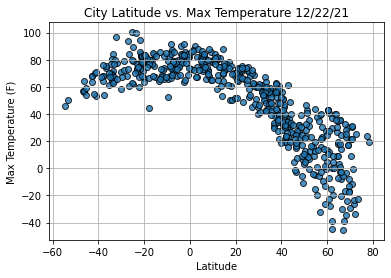

In [17]:
## Plot Latitude vs. Temperature
# To create a scatter plot for the latitude vs. maximum temperature

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

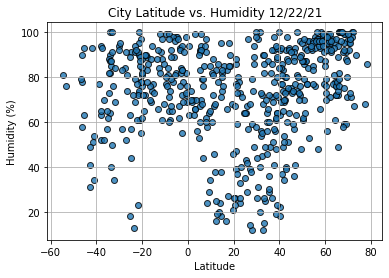

In [18]:
## Plot Latitude vs. Humidity
# Repurpose the code above the maximum temperature scatter plot 
# and create a scatter plot for the latitude versus humidity.

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Change the y-axis variable to "humidity," 
# the title to "Humidity," and the y-axis label to "Humidity (%)."

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


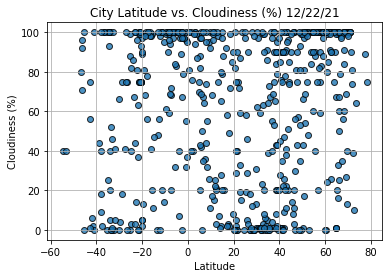

In [19]:
## Plot Latitude vs. Cloudiness
# - refactor the above code by changing the y-axis variable to "cloudiness," 
#   the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)"

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

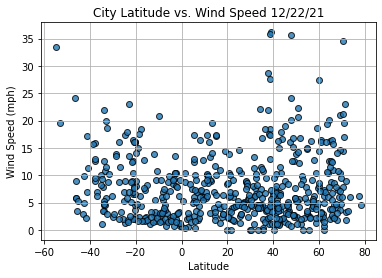

In [20]:
## Plot Latitude vs. Wind Speed
# - repurpose the code above by changing the y-axis variable to "wind speed," 
#   the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)"

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
## Find the Correlation Between Latitude and Maximum Temperature
# Create a Linear Regression Function
# - create a function, "plot_linear_regression", 
# - and add the four parameters inside the parentheses: 
#   x_values, y_values, y_label, and text_coordinates
# - add a fifth parameter for the title, called, title

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
## Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2021-12-22 04:45:30
Lat                      -42.8794
Lng                      147.3294
Max Temp                    68.02
Humidity                       41
Cloudiness                     75
Wind Speed                    3.0
Name: 13, dtype: object

In [23]:
# Get all Northern Hemisphere latitudes, 
# for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
548     True
549     True
550    False
551    False
552     True
Name: Lat, Length: 553, dtype: bool

In [24]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Quibdo,CO,2021-12-22 04:47:33,5.6947,-76.6611,72.00,99,100,0.34
2,Tasiilaq,GL,2021-12-22 04:47:33,65.6145,-37.6368,35.76,49,33,6.71
4,Provideniya,RU,2021-12-22 04:47:34,64.3833,-173.3000,8.71,78,90,20.13
6,Gat,IL,2021-12-22 04:47:35,31.6100,34.7642,56.39,100,59,11.39
10,Raudeberg,NO,2021-12-22 04:47:36,61.9875,5.1352,36.86,93,100,3.00


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

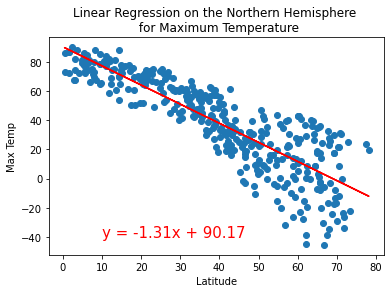

In [26]:
## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# - To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values
# - Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame

# - Call the plot_linear_regression function with the x and y values, and 
#   edit the title, y_label, and text_coordinates for the maximum temperature scatter plot

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-40))

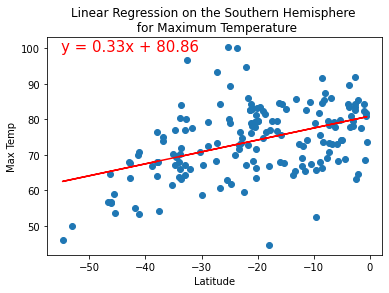

In [30]:
## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
# - Call the plot_linear_regression function with the x and y values, and 
#   edit the title, y_label, and text_coordinates for the maximum temperature scatter plot

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,99))

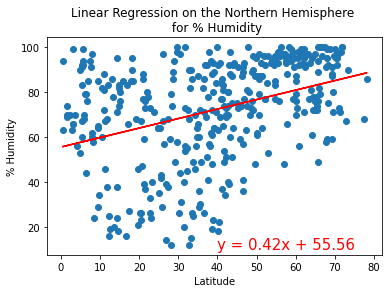

In [31]:
## Find the Correlation Between Latitude and Percent Humidity
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
# - To perform the linear regression on the percent humidity for the Northern Hemisphere, 
#   set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame
# - Call the plot_linear_regression function with the x- and y-values, 
#   and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

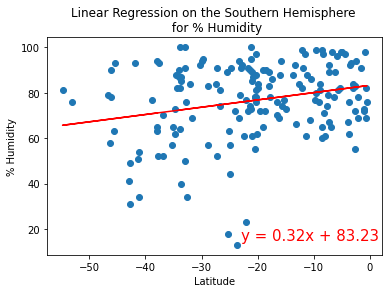

In [32]:
# - For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, 
#   set the x-value equal to the latitude column and y-value equal to the humidity column from the southern_hemi_df DataFrame.
# - Call the plot_linear_regression function, with the x-and y-values, and 
#   edit the title, y_label, and text_coordinates for the percent humidity scatter plot

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-23,15))

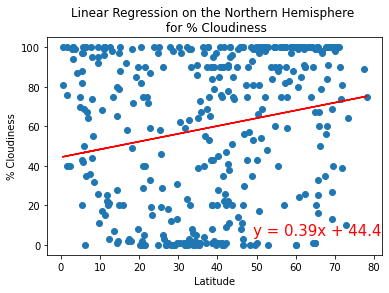

In [39]:
## Find the Correlation Between Latitude and Percent Cloudiness
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
# 1.Refactor the code we have been using for linear regression lines and plots to 
#   create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
# 2.Call the plot_linear_regression function with the correct arguments to 
#   create the linear regression line and plot for percent cloudiness in the Northern Hemisphere.  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(49,5))

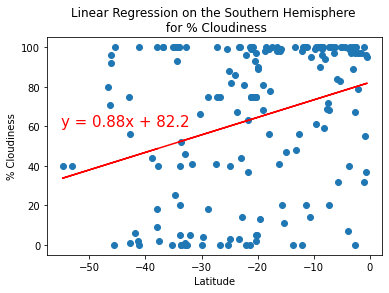

In [41]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
# - Generate the x-value equal to the latitude column and the y-value equal to the cloudiness column from the southern_hemi_df DataFrame
# - Call the plot_linear_regression function. Edit the title, y_label, and text_coordinates for the percent cloudiness scatter plot

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,60))

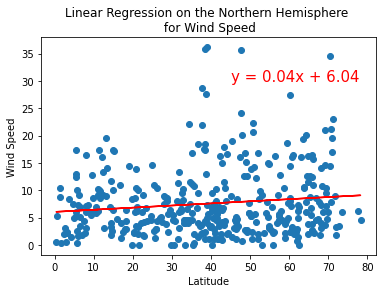

In [43]:
## Find the Correlation Between Latitude and Wind Speed
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# - Call the plot_linear_regression function, with the x-value equal to the Latitude column and the y-value equal to the Wind Speed column from the northern_hemi_df DataFrame
# - Edit the title, y_label, and text_coordinates for the wind speed scatter plot

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(45,30))

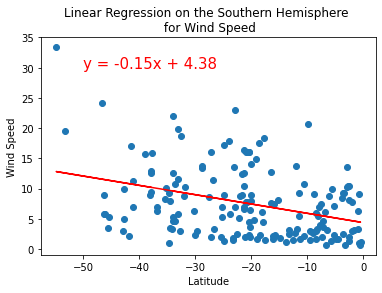

In [44]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# - Call the plot_linear_regression function, with the x-value equal to the latitude column and the y-value equal to wind speed column from the southern_hemi_df DataFrame
# - Edit the title, y_label, and text_coordinates for the wind speed scatter plot

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))